<img src="./images/header.png">

***

 # <center> Spatial-temporal differences in cloud cover of satellite observations across the Brazilian Amazon rainforest</center>
<center> Willian Vieira de Oliveira </center>

<div style="text-align: right"> [ Part 1 - About the project and the data ] </div>

### SUMMARY

1. [**About**](#About)
    
1. [**The Data**](#TheData)
    1. [Raw data](#RawData)
    1. [Processed data](#ProcessedData)
    1. [Additional data](#AdditionalData)
    
1. [**Questions about the data**](#Questions)

1. [**Basic processing of the data**](./2_Basic_processing.ipynb#BasicProc)

1. [**Statistics**](./2_Basic_processing.ipynb#Stats)

1. [**Exploratory Data Analysis**](./3_EDA.ipynb#EDA)

1. [**Results**](./4_Results_and_Conclusion.ipynb#Results)

1. [**Conclusion**](./4_Results_and_Conclusion.ipynb#Conclusion)
***

<a id='About'></a>
## 1. About

<div style="text-align: right"><b>OBS.:</b> I am still not sure if I will include CBERS-4/MUX data in the analysis.</div>

<div style="text-align: justify"> <br>
Earth observation (EO) satellites provide data that are essential for a range of non-military uses. Among the possible uses, Young and Onoda (2017) highlight the importance of this source of data for addressing environmental problems. Environmental applications of satellite data include, for example, vegetation mapping, fire risk estimation and water stress monitoring. In addition, the use of satellite images allows analysing how habitats change as a result of human activities. For instance, the use of satellite images acquired by various sensors assists the detection and measurement of deforestation in the Brazilian Amazon rainforest. In order to do so, it can be used both optical and radar sensors, that present different spatial and temporal resolutions. This variety of data sources favours the development of studies in different scales, with different revisit periods. 

<div style="text-align: justify"> <br>
The sensors <strike>CBERS-4/MUX, </strike>Landsat-8/OLI and Sentinel-2/MSI are examples of optical sensors that are commonly used for monitoring the Brazilian rainforest. The OLI sensor presents spatial resolution of 30 meters, in contrast to the <strike>20-meter and </strike>10-meter spatial resolution of the <strike>MUX and </strike>MSI sensor<strike>s</strike>. In addition, these sensors present temporal resolution of <strike>26 days (MUX), </strike>16 days (OLI) and 5 days (MSI), respectively. The Sentinel-2/MSI provides this temporal resolution considering two satellites, Sentinel-2A and Sentinel-2B. The products generated by these sensors are freely available, which contributes to the increasingly use of these data sources for several purposes (Sano et al., 2007; Lima et al., 2019), including the monitoring of the selective logging in the Brazilian Amazon. However, these products are usually impacted by the frequent presence of cloud cover. Persistent cloud cover represents a recurrent problem in optical remote sensing analysis in tropical regions. </div>

<div style="text-align: justify"> <br>
Therefore, the vulnerability of optical sensors to the presence of cloud cover represents a problem for studies that depend on the availability of cloud-free imagery. In this context, this study presents an analysis on the spatio-temporal differences in cloud cover observed in satellite imagery provided by different sensors, accross the Brazilian Amazon region. In order to do so, I analysed the metadata archives of the sensors <strike>CBERS-4/MUX, </strike>Landsat-8/OLI and Sentinel-2/MSI, regarding the period from <b>February 2013 to July 2019</b>. This period of study was defined considering the Landsat-8/OLI timeline, which represents one of the most commonly used optical sensors. The sensor Ladnsat-8/OLI provides global coverage of observation since February 2013. </div>


### Brazilian Amazon

The following image illustrates the area covered by the Brazilian Amazon and the states that it covers.

In [1]:
from matplotlib import pyplot as plt
import geopandas as gpd

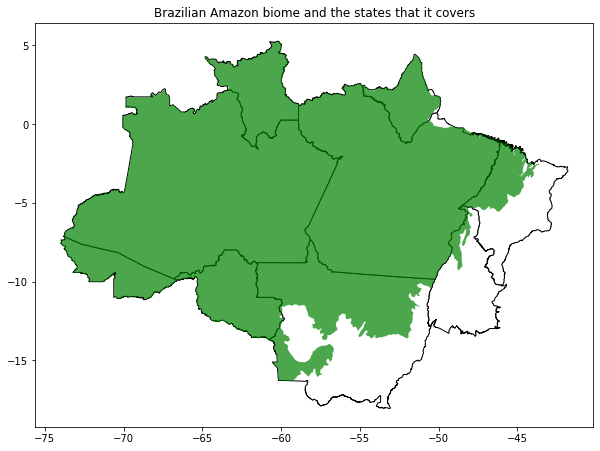

In [3]:
BR_Amazon_Estates = gpd.read_file('Data/Amazonia_Legal/UFS_AMZLEG_LLWGS84.shp', encoding='utf-8')
BR_Amazon_Biome = gpd.read_file('Data/Amazonia_Legal/Amazon_biome_BR.shp', encoding='utf-8')

fig, ax = plt.subplots(figsize=(10, 8))
BR_Amazon_Estates.plot(color='white', ax=ax, linewidth=1, edgecolor='black')
BR_Amazon_Biome.plot(color='green', label='Brazilian Amazon', markersize=0.2, ax=ax, alpha=0.7)
plt.title('Brazilian Amazon biome and the states that it covers')
plt.show()

### Timeline of the analysed sensors

<div style="text-align: justify"> <br>
The period of study of this project was defined considering mainly the Landsat-8/OLI timeline, which started in February 2013. The following figures illustrate the timelime of the CBERS, LANDSAT and Sentinel missions.
</div>

#### CBERS timeline:
<img src="./images/CBERS_4_timeline.png" width="60%">
<center>(CAMARA, 2009)</center>

#### LANDSAT timeline:
<img src="./images/landsat-timeline.jpg" width="60%">

#### Sentinel timeline:
<img src="./images/Sentinel_timeline.png" width="55%">

***
<a id='TheData'></a>
## 2. The Data

<a id='RawData'></a>
### 2.1 Raw data

<div style="text-align: justify"> <br>
The data analysed in this project includes the archives of metadata related to the images acquired by the sensors Landsat-8/OLI and Sentinel-2/MSI, accross the region of the Brazilian Amazon during the period between February 2013 and July 2019. These datasets were obtained using the Earth Explorer (EE) tool. The search was performed using a shapefile that describes the limits of the Brazilian states that include the Amazon Forest. However, the EE allows the use of shapefiles composed of up to 30 points. Therefore, it is possible to use only a limited representation of the boundaries of the Brazilian Amazon. The original dataset will be later filtered to include only the metadata regarding scenes that intersects the Amazon biome.
</div>

<div style="text-align: justify"> <br>
This data is not tidy, once the data is not well-organized ant there is too much information to be described in a single table. The raw data includes data regarding 34.689 scenes obtained by the Landsat-8/OLI and 142.994 scenes acquired by the Sentinel-2/MSI. The difference between the number of scenes acquired by the sensors is due to the characteristics of each sensor and their respective temporal resolution.
</div>

#### Original Landsat-8/OLI metadata archive:

In [4]:
L8_archive = gpd.read_file('Data/Metadata/EarthExplorer/LANDSAT_8_C1_330455.csv', encoding='utf-8')

In [105]:
gpd.pd.set_option('display.max_columns', None)
L8_archive.head(5)

,Landsat Product Identifier,Landsat Scene Identifier,Acquisition Date,Collection Category,Collection Number,WRS Path,WRS Row,Target WRS Path,Target WRS Row,Nadir/Off Nadir,Roll Angle,Date L-1 Generated,Start Time,Stop Time,Station Identifier,Day/Night Indicator,Land Cloud Cover,Scene Cloud Cover,Ground Control Points Model,Ground Control Points Version,Geometric RMSE Model (meters),Geometric RMSE Model X,Geometric RMSE Model Y,Image Quality,Processing Software Version,Sun Elevation L1,Sun Azimuth L1,TIRS SSM Model,Data Type Level-1,Sensor Identifier,Panchromatic Lines,Panchromatic Samples,Reflective Lines,Reflective Samples,Thermal Lines,Thermal Samples,Map Projection Level-1,UTM Zone,Datum,Ellipsoid,Grid Cell Size Panchromatic,Grid Cell Size Reflective,Grid Cell Size Thermal,Bias Parameter File Name OLI,Bias Parameter File Name TIRS,Calibration Parameter File,RLUT File Name,Center Latitude,Center Longitude,UL Corner Lat,UL Corner Long,UR Corner Lat,UR Corner Long,LL Corner Lat,LL Corner Long,LR Corner Lat,LR Corner Long,Center Latitude dec,Center Longitude dec,UL Corner Lat dec,UL Corner Long dec,UR Corner Lat dec,UR Corner Long dec,LL Corner Lat dec,LL Corner Long dec,LR Corner Lat dec,LR Corner Long dec,Display ID,Ordering ID,Browse Link,geometry
0,LC08_L1GT_228058_20190731_20190731_01_RT,LC82280582019212LGN00,2019/07/31,RT,1,228,058,228,058,NADIR,-.001,2019/07/31,2019:212:13:52:35.1813890,2019:212:13:53:06.9513880,LGN,DAY,46.82,46.82,-1,4,0,0,0,9,LPGS_13.1.0,58.51089092,58.82830696,PRELIMINARY,OLI_TIRS_L1GT,OLI_TIRS,15481,15161,7741,7581,7741,7581,UTM,21,WGS84,WGS84,15,30,30,LO8BPF20190731132309_20190731140944.01,LT8BPF20190730101752_20190730110028.01,LC08CPF_20190701_20190930_01.01,LC08RLUT_20150303_20431231_01_12.h5,"b""2\xb053'34.80N,54\xb040'47.64W""","b""3\xb056'17.38N,55\xb020'00.46W""","b""3\xb034'43.79N,53\xb039'27.36W""","b""2\xb012'09.65N,55\xb042'07.02W""","b""1\xb050'24.97N,54\xb001'43.50W""",2.893,-54.6799,3.93816,-55.33346,3.57883,-53.6576,2.20268,-55.70195,1.84027,-54.02875,LC08_L1GT_228058_20190731_20190731_01_RT,LC82280582019212LGN00,https://earthexplorer.usgs.gov/browse-link/128...,None,None,None,None,None,None
1,LC08_L1TP_228059_20190731_20190731_01_RT,LC82280592019212LGN00,2019/07/31,RT,1,228,059,228,059,NADIR,-.001,2019/07/31,2019:212:13:52:59.1020800,2019:212:13:53:30.8720790,LGN,DAY,18.89,18.89,34,4,9.842,6.81,7.106,9,LPGS_13.1.0,57.56644241,57.03247746,PRELIMINARY,OLI_TIRS_L1TP,OLI_TIRS,15481,15161,7741,7581,7741,7581,UTM,21,WGS84,WGS84,15,30,30,LO8BPF20190731132309_20190731140944.01,LT8BPF20190730101752_20190730110028.01,LC08CPF_20190701_20190930_01.01,LC08RLUT_20150303_20431231_01_12.h5,"b""1\xb026'46.93N,54\xb059'15.58W""","b""2\xb029'29.80N,55\xb038'25.91W""","b""2\xb007'56.42N,53\xb057'59.22W""","b""0\xb045'22.50N,56\xb000'33.01W""","b""0\xb023'37.75N,54\xb020'11.18W""",1.44637,-54.98766,2.49161,-55.64053,2.13234,-53.96645,.75625,-56.00917,.39382,-54.33644,LC08_L1TP_228059_20190731_20190731_01_RT,LC82280592019212LGN00,https://earthexplorer.usgs.gov/browse-link/128...,None,None,None,None,None,None
2,LC08_L1TP_228060_20190731_20190731_01_RT,LC82280602019212LGN00,2019/07/31,RT,1,228,060,228,060,NADIR,-.001,2019/07/31,2019:212:13:53:23.0227720,2019:212:13:53:54.7927700,LGN,DAY,12.86,12.86,47,4,9.407,7.034,6.246,9,LPGS_13.1.0,56.58876726,55.35186994,PRELIMINARY,OLI_TIRS_L1TP,OLI_TIRS,15501,15181,7751,7591,7751,7591,UTM,21,WGS84,WGS84,15,30,30,LO8BPF20190731132309_20190731140944.01,LT8BPF20190730101752_20190730110028.01,LC08CPF_20190701_20190930_01.01,LC08RLUT_20150303_20431231_01_12.h5,"b""0\xb000'00.83S,55\xb017'42.43W""","b""1\xb002'42.32N,55\xb056'51.29W""","b""0\xb041'09.10N,54\xb016'28.06W""","b""0\xb041'24.32S,56\xb019'00.16W""","b""1\xb003'09.25S,54\xb038'37.10W""",-.00023,-55.29512,1.04509,-55.94758,.68586,-54.27446,-.69009,-56.31671,-1.05257,-54.64364,LC08_L1TP_228060_20190731_20190731_01_RT,LC82280602019212LGN00,https://earthexplorer.usgs.gov/browse-link/128...,None,None,None,None,None,Non

#### Original Sentinel-2/MSI metadata archive:

In [6]:
S2_archive = gpd.read_file('Data/Metadata/EarthExplorer/SENTINEL_2A_330458.csv', encoding='utf-8')

In [107]:
S2_archive.head(5)

,Entity ID,Acquisition Start Date,Acquisition End Date,Tile Number,Cloud Cover,Agency,Platform,Vendor,Vendor Tile ID,Orbit Number,Orbit Direction,Vendor Software Version,Production Date,Vendor Product ID,Archiving Center,Datatake Type,Datatake Identifier,Data Type,Product Type,Product Format,Processing Level,Datastrip ID,Datum,Map Projection,UTM Zone,EPSG Code,Resolution,Units,Sun Zenith Angle Mean,Sun Azimuth Angle Mean,Quantification,Center Latitude,Center Longitude,NW Corner Lat,NW Corner Long,NE Corner Lat,NE Corner Long,SE Corner Lat,SE Corner Long,SW Corner Lat,SW Corner Long,Center Latitude dec,Center Longitude dec,NW Corner Lat dec,NW Corner Long dec,NE Corner Lat dec,NE Corner Long dec,SE Corner Lat dec,SE Corner Long dec,SW Corner Lat dec,SW Corner Long dec,Display ID,Ordering ID,Browse Link,geometry
0,8459228,2019-07-31T14:01:00.461Z,2019-07-31T14:04:33.319Z,T21MXN,0,ESA,SENTINEL-2B,EPAE,L1C_T21MXN_A012534_20190731T140100,67,Descending Orbit,02.08,2019-07-31T18:41:21.000000Z,S2B_MSIL1C_20190731T140059_N0208_R067_T21MXN_2...,EPA_,INS-NOBS,GS2B_20190731T140059_012534_N02.08,UINT16,S2MSI1C,JPEG2000,LEVEL-1C,S2B_OPER_MSI_L1C_DS_EPAE_20190731T184121_S2019...,WGS84,UTM,21S,32721,10 20 60,METER,35.9019781861549,45.3314040108965,10000,"b""6\xb049'37.54S,55\xb035'53.57W""","b""6\xb019'54.16S,56\xb005'45.18W""","b""6\xb019'44.53S,55\xb006'12.37W""","b""7\xb019'18.27S,55\xb005'58.28W""","b""7\xb019'29.43S,56\xb005'38.46W""",-6.8270935,-55.598215,-6.3317122,-56.0958834,-6.3290357,-55.1034361,-7.3217409,-55.0995234,-7.3248413,-56.0940171,L1C_T21MXN_A012534_20190731T140100,8459228,https://earthexplorer.usgs.gov/browse-link/108...,None,None,None,None,None,None
1,8459248,2019-07-31T14:04:26.104Z,2019-07-31T14:16:52.912Z,T21LYF,0,ESA,SENTINEL-2B,SGS_,L1C_T21LYF_A012534_20190731T140426,67,Descending Orbit,02.08,2019-07-31T18:59:58.000000Z,S2B_MSIL1C_20190731T140059_N0208_R067_T21LYF_2...,SGS_,INS-NOBS,GS2B_20190731T140059_012534_N02.08,UINT16,S2MSI1C,JPEG2000,LEVEL-1C,S2B_OPER_MSI_L1C_DS_SGS__20190731T185958_S2019...,WGS84,UTM,21S,32721,10 20 60,METER,39.7230947954757,38.356051698176,10000,"b""13\xb008'58.90S,54\xb038'56.28W""","b""12\xb039'27.50S,55\xb009'31.80W""","b""12\xb038'55.45S,54\xb008'54.80W""","b""13\xb038'25.34S,54\xb008'13.46W""","b""13\xb039'00.00S,55\xb009'05.08W""",-13.1496944,-54.648968,-12.6576391,-55.158834,-12.6487348,-54.1485557,-13.6403721,-54.1370711,-13.6499997,-55.1514113,L1C_T21LYF_A012534_20190731T140426,8459248,https://earthexplorer.usgs.gov/browse-link/108...,None,None,None,None,None,None
2,8459266,2019-07-31T13:12:47.462Z,2019-07-31T13:14:24.872Z,T23MQQ,.0106,ESA,SENTINEL-2A,SGS_,L1C_T23MQQ_A021442_20190731T131247,138,Descending Orbit,02.08,2019-07-31T14:46:03.000000Z,S2A_MSIL1C_20190731T131251_N0208_R138_T23MQQ_2...,SGS_,INS-NOBS,GS2A_20190731T131251_021442_N02.08,UINT16,S2MSI1C,JPEG2000,LEVEL-1C,S2A_OPER_MSI_L1C_DS_SGS__20190731T144603_S2019...,WGS84,UTM,23S,32723,10 20 60,METER,34.5318630639854,46.9885719595683,10000,"b""5\xb000'57.60S,42\xb042'05.41W""","b""4\xb031'16.10S,43\xb011'51.84W""","b""4\xb031'04.81S,42\xb012'31.48W""","b""5\xb030'36.48S,42\xb012'16.29W""","b""5\xb030'50.26S,43\xb011'42.03W""",-5.0159995,-42.7015027,-4.5211384,-43.1977339,-4.5180014,-42.2087444,-5.510132,-42.2045253,-5.5139615,-43.1950072,L1C_T23MQQ_A021442_20190731T131247,8459266,https://earthexplorer.usgs.gov/browse-link/108...,None,None,None,None,None,None
3,8467276,2019-07-31T14:47:36.457Z,2019-07-31T14:56:41.230Z,T19LDJ,0,ESA,SENTINEL-2A,SGS_,L1C_T19LDJ_A021443_20190731T144736,139,Descending Orbit,02.08,2019-07-31T18:09:42.000000Z,S2A_MSIL1C_20190731T144741_N0208_R139_T19LDJ_2...,SGS_,INS-NOBS,GS2A_20190731T144741_021443_N02.08,UINT16,S2MSI1C,JPEG2000,LEVEL-1C,S2A_OPER_MSI_L1C_DS_SGS__20190731T180942_S2019...,WGS84,UTM,19S,32719,10 20 60,METER,39.1675085567964,43.1066984804499,10000,"b""10\xb026'49.70S,69\xb024'44.82W""","b""9\xb056'58.63S,69\xb054'45.48W""","b""9\xb057'03.07S,68\xb054'39.45W""","b""10\xb056'38.11S,68\x

<a id='ProcessedData'></a>
### 2.2 Preprocessed data

<div style="text-align: justify"> <br>
The original metadata archives do not follow the same structure. Therefore, it is necessary to extract only the data that might be useful in this project and define a new dataframe, composed of data related to the products obtained by both sensors.
</div>

#### Points to consider:

- Sentinel 2 products do not use the Path/Row naming convention. They are provided in tiles (See Section 7.2.2 of the [Product Specification Document](https://sentinel.esa.int/documents/247904/685211/Sentinel-2-Products-Specification-Document)).
    - Naming convention: https://sentinel.esa.int/web/sentinel/user-guides/sentinel-2-msi/naming-convention
    - Sentinel 2 data dictionary: https://lta.cr.usgs.gov/DD/Sentinel2.html
    
    
- The naming convention of Sentinel 2 products (Vendor ID) might vary according to the scene. Examples of product ID related to scenes acquired in the same day (03/02/2019):
    - S2A_OPER_MSI_L1C_TL_SGS__20160818T195844_A006042_T19MEV_N02.04
    - L1C_T23LLH_A006041_20160818T132512
    

#### Structure of the new dataframe

In [108]:
import numpy as np
import pandas as pd
# Header of the new dataframe
header = np.array(['Product ID', 'Acquisition Date', 'WRS Path', 'WRS Row', 
                   'Tile Number', 'Platform', 'Cloud cover', 'Datum', 
                   'UTM Zone', 'Spatial Resolution - Pan', 'Spatial Resolution - Refletive', 'Spatial Resolution - Thermal'])
                  
# Dataframe, composed only by the header
df = pd.DataFrame(columns=list(header))
df

,Product ID,Acquisition Date,WRS Path,WRS Row,Tile Number,Platform,Cloud cover,Datum,UTM Zone,Spatial Resolution - Pan,Spatial Resolution - Refletive,Spatial Resolution - Thermal


#### Assigning data to the new dataframe

<div style="text-align: justify"> <br>
First of all, we select only the information of interest and attribute it to a dictionary. We perform this procedure in order to improve the performance of the data selection and the definition of an unique dataframe.
</div>    

##### Landsat-8/OLI

In [72]:
L8_dict = {}

for index, row in L8_archive.iterrows():
    L8_dict[index] = {
        "Product ID": row["Landsat Product Identifier"], 
        "Acquisition Date": row['Acquisition Date'],
        "WRS Path": row['WRS Path'],
        "WRS Row": row['WRS Row'],
        "Tile Number": None,
        "Platform": 'Landsat-8',
        "Cloud cover": row['Land Cloud Cover'],
        "Datum": row['Datum'],
        "UTM Zone": row['UTM Zone'],
        "Spatial Resolution - Pan": row['Grid Cell Size Panchromatic'],
        "Spatial Resolution - Refletive": row['Grid Cell Size Reflective'],
        "Spatial Resolution - Thermal": row['Grid Cell Size Thermal']
    }

In [77]:
L8_df = pd.DataFrame.from_dict(L8_dict, "index")
L8_df

,Product ID,Acquisition Date,WRS Path,WRS Row,Tile Number,Platform,Cloud cover,Datum,UTM Zone,Spatial Resolution - Pan,Spatial Resolution - Refletive,Spatial Resolution - Thermal
0,LC08_L1GT_228058_20190731_20190731_01_RT,2019/07/31,228,058,None,Landsat-8,46.82,WGS84,21,15,30,30
1,LC08_L1TP_228059_20190731_20190731_01_RT,2019/07/31,228,059,None,Landsat-8,18.89,WGS84,21,15,30,30
2,LC08_L1TP_228060_20190731_20190731_01_RT,2019/07/31,228,060,None,Landsat-8,12.86,WGS84,21,15,30,30
3,LC08_L1TP_228061_20190731_20190731_01_RT,2019/07/31,228,061,None,Landsat-8,7.67,WGS84,21,15,30,30
4,LC08_L1TP_228062_20190731_20190731_01_RT,2019/07/31,228,062,None,Landsat-8,8.1,WGS84,21,15,30,30
5,LC08_L1TP_228063_20190731_20190731_01_RT,2019/07/31,228,063,None,Landsat-8,.1,WGS84,21,15,30,30
6,LC08_L1TP_228064_20190731_20190731_01_RT,2019/07/31,228,064,None,Landsat-8,0,WGS84,21,15,30,30
7,LC08_L1TP_228065_20190731_20190731_01_RT,2019/07/31,228,065,None,Landsat-8,.8,WGS84,21,15,30,30
8,LC08_L1TP_228066_20190731_20190731_01_RT,2019/07/31,228,066,None,Landsat-8,3.94,WGS84,21,15,30,30
9,LC08_L1TP_228067_20190731_20190731_01_RT,2019/07/31,228,067,None,Landsat-8,9.83,WGS84,21,15,30,30


##### Sentinel-2/MSI

In [99]:
S2_dict = {}

for index, row in S2_archive.iterrows():
    S2_dict[index] = {
        "Product ID": row['Vendor Tile ID'], 
        "Acquisition Date": datetime.strptime(scene['Acquisition End Date'][0:10], '%Y-%m-%d').date(),
        "WRS Path": None,
        "WRS Row": None,
        "Tile Number": row['Tile Number'],
        "Platform": row['Platform'],
        "Cloud cover": row['Cloud Cover'],
        "Datum": row['Datum'],
        "UTM Zone": row['UTM Zone'],
        "Spatial Resolution - Pan": row['Resolution'][0:2],
        "Spatial Resolution - Refletive": row['Resolution'][4:6],
        "Spatial Resolution - Thermal": row['Resolution'][8:10]
    }

In [100]:
S2_df = pd.DataFrame.from_dict(S2_dict, "index")
S2_df

,Product ID,Acquisition Date,WRS Path,WRS Row,Tile Number,Platform,Cloud cover,Datum,UTM Zone,Spatial Resolution - Pan,Spatial Resolution - Refletive,Spatial Resolution - Thermal
0,L1C_T21MXN_A012534_20190731T140100,2019-02-03,None,None,T21MXN,SENTINEL-2B,0,WGS84,21S,10,20,60
1,L1C_T21LYF_A012534_20190731T140426,2019-02-03,None,None,T21LYF,SENTINEL-2B,0,WGS84,21S,10,20,60
2,L1C_T23MQQ_A021442_20190731T131247,2019-02-03,None,None,T23MQQ,SENTINEL-2A,.0106,WGS84,23S,10,20,60
3,L1C_T19LDJ_A021443_20190731T144736,2019-02-03,None,None,T19LDJ,SENTINEL-2A,0,WGS84,19S,10,20,60
4,L1C_T23MQR_A021442_20190731T131247,2019-02-03,None,None,T23MQR,SENTINEL-2A,.4756,WGS84,23S,10,20,60
5,L1C_T19LDL_A021443_20190731T144736,2019-02-03,None,None,T19LDL,SENTINEL-2A,0,WGS84,19S,10,20,60
6,L1C_T19LDH_A021443_20190731T144736,2019-02-03,None,None,T19LDH,SENTINEL-2A,0,WGS84,19S,10,20,60
7,L1C_T22NDF_A012534_20190731T140100,2019-02-03,None,None,T22NDF,SENTINEL-2B,24.4119,WGS84,22N,10,20,60
8,L1C_T21MXP_A012534_20190731T140426,2019-02-03,None,None,T21MXP,SENTINEL-2B,0,WGS84,21S,10,20,60
9,L1C_T21MZS_A012534_20190731T140100,2019-02-03,None,None,T21MZS,SENTINEL-2B,3.1434,WGS84,21S,10,20,60


##### Concatenation of both dataframes

In [111]:
concat_df = pd.concat([L8_df, S2_df])

print("Shape of the new dataframe: ", concat_df.shape)

Shape of the new dataframe:  (177683, 12)


In [102]:
concat_df

,Product ID,Acquisition Date,WRS Path,WRS Row,Tile Number,Platform,Cloud cover,Datum,UTM Zone,Spatial Resolution - Pan,Spatial Resolution - Refletive,Spatial Resolution - Thermal
0,LC08_L1GT_228058_20190731_20190731_01_RT,2019/07/31,228,058,None,Landsat-8,46.82,WGS84,21,15,30,30
1,LC08_L1TP_228059_20190731_20190731_01_RT,2019/07/31,228,059,None,Landsat-8,18.89,WGS84,21,15,30,30
2,LC08_L1TP_228060_20190731_20190731_01_RT,2019/07/31,228,060,None,Landsat-8,12.86,WGS84,21,15,30,30
3,LC08_L1TP_228061_20190731_20190731_01_RT,2019/07/31,228,061,None,Landsat-8,7.67,WGS84,21,15,30,30
4,LC08_L1TP_228062_20190731_20190731_01_RT,2019/07/31,228,062,None,Landsat-8,8.1,WGS84,21,15,30,30
5,LC08_L1TP_228063_20190731_20190731_01_RT,2019/07/31,228,063,None,Landsat-8,.1,WGS84,21,15,30,30
6,LC08_L1TP_228064_20190731_20190731_01_RT,2019/07/31,228,064,None,Landsat-8,0,WGS84,21,15,30,30
7,LC08_L1TP_228065_20190731_20190731_01_RT,2019/07/31,228,065,None,Landsat-8,.8,WGS84,21,15,30,30
8,LC08_L1TP_228066_20190731_20190731_01_RT,2019/07/31,228,066,None,Landsat-8,3.94,WGS84,21,15,30,30
9,LC08_L1TP_228067_20190731_20190731_01_RT,2019/07/31,228,067,None,Landsat-8,9.83,WGS84,21,15,30,30


#### Writing the new dataframe to file

In [117]:
filename = 'Output/Metadata/Metadata_L8_S2.csv'

try:
    concat_df.to_csv(filename, sep=',', index=False, encoding='utf-8')
    print("The dataframe was written to file!")
except Exception as e:
    print(str(e))

The dataframe was written to file!


<a id='AdditionalData'></a>
### 2.3 Additional data

In addition, the following data ca also be useful:

1. Shapefile of the limits of Brazil and its states (0.71Mb)
    - http://www.dpi.inpe.br/Ambdata/unidades_administrativas.php
<br><br>
1. Shapefile of the limits of the Brazilian Amazon (0.30Mb)
    - http://www.dpi.inpe.br/amb_data/Shapefiles/UF_AmLeg_LLwgs84.zip
<br><br>
1. Shapefile of the Brazilian Amazon biome (0.28Mb)
    - https://opendata.arcgis.com/datasets/54ec099791644be4b273d9d8a853d452_4.zip
<br><br>
1. Shapefile of the annual deforastation increment, from 2008 to 2018 (204Mb)
    - http://terrabrasilis.dpi.inpe.br/download/prodes-legal-amz/vector/yearly_deforestation_2008_2018.zip

***
<a id='Questions'></a>

## 3. Questions about the data

1. How much scenes are necessary to cover the entire Brazilian Amazon, considering each sensor?
<br>

1. What is the average percentage of cloud cover observed for each sensor?
<br>

1. Which regions are more affected by cloud cover?
    1. Do the regions that are more affected by cloud cover present the highest deforastation rates? (????? deforastation data)
<br><br>

1. What is the mean cloud covarage observed in each season of the year?
<br>

1. Are Landsat-8/OLI and Sentinel-2 more vulnerable to cloud cover during a specific season of the year?
<br>

1. What is the percentage of scenes free of cloud in each region?
<br>

1. Which state did present the lowest annual cloud cover?

[<div style="text-align: right"> **Next notebook >>** </div>](./2_Basic_processing.ipynb)

***
## References

[1] Rene Beuchle , Hugh D. Eva , Hans-Jürgen Stibig , Catherine Bodart , Andreas Brink , Philippe Mayaux , Desiree Johansson , Frederic Achard & Alan Belward (2011) A satellite data set for tropical forest area change assessment, **International Journal of Remote Sensing**, 32:22, 7009-7031, DOI: 10.1080/01431161.2011.611186

[2] Sano E E, Ferreira L G, Asner G P et al., 2007. Spatial and temporal probabilities of obtaining cloud-free Landsat
images over the Brazilian tropical savanna. **International Journal of Remote Sensing**, 28(12): 2739–2752.

[3] Lima, T.A., Beuchle, R., Langner, A., Grecchi, R.C., Griess, V.C., & Achard, F. (2019). Comparing Sentinel-2 MSI and Landsat 8 OLI Imagery for Monitoring Selective Logging in the Brazilian Amazon. **Remote Sensing**, 11, 961.

[4] Young O.R., Onoda M. (2017) **Satellite Earth Observations in Environmental Problem-Solving**. In: Onoda M., Young O. (eds) Satellite Earth Observations and Their Impact on Society and Policy. Springer, Singapore, DOI: 10.1080/01431161.2011.611186